# Imports and Constants

In [1]:
import polars as pl
import pandas as pd
import networkx as nx
import numpy as np
from datetime import datetime
import re

import matplotlib.pyplot as plt
from matplotlib import colors as plt_colors
import seaborn as sns
from query_data import get_endpoint, query_number_of_letters_and_actors, query_all_letters, query_actors

/u/01/poikkih1/data/Documents/CoCo/coco_about_data/scripts/query_data.py:138: SyntaxWarning: invalid escape sequence '\('
  BIND(REPLACE(STR(?_datasource), " \\\(Word files\\\)", "") AS ?datasource)
/u/01/poikkih1/data/Documents/CoCo/coco_about_data/scripts/query_data.py:152: SyntaxWarning: invalid escape sequence '\('
  BIND(REPLACE(STR(?_datasource), " \\\(Word files\\\)", "") AS ?datasource)


In [2]:
FIG_SIZE = (10,10)

# Import Data Frames

In [3]:
# Transform a pandas DataFrame to a Polars DataFrame
#df_polars = pl.from_pandas(df_pandas)

In [3]:
endpoint = get_endpoint()

In [4]:
df_numbers = query_number_of_letters_and_actors(endpoint)
df_numbers.head()

datasource,Letters,Actors
str,i64,i64
"""Åbo Akademi University Library""",366614,27350
"""The National Archives of Finla…",292073,32325
"""The National Library of Finlan…",281157,33632
"""The Society of Swedish Literat…",198490,16013
"""Finnish Literature Society""",116646,13882


In [ ]:
#df_edges = query_all_letters(endpoint, save="../dataframes/edges_6_25.parquet")
df_edges = pl.read_parquet("../dataframes/edges_11_6_25.parquet")
df_edges.head()

evt,date,datasource,fonds,year,source,target,sending_place,target_place,language
str,str,str,str,str,str,str,str,str,str
"""http://ldf.fi/coco/letters/HCM…","""8.6.1913""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1913""","""http://ldf.fi/coco/provided/p5…","""http://ldf.fi/coco/provided/p1…","""Wien""","""> Missing value""","""http://ldf.fi/schema/coco/miss…"
"""http://ldf.fi/coco/letters/HCM…","""20.10.1908""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1908""","""http://ldf.fi/coco/provided/p2…","""http://ldf.fi/coco/provided/p1…","""Helsinki""","""> Missing value""","""http://ldf.fi/schema/coco/miss…"
"""http://ldf.fi/coco/letters/HCM…","""24.3.1907""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1907""","""http://ldf.fi/coco/provided/p9…","""http://ldf.fi/coco/provided/p1…","""Raahe""","""> Missing value""","""http://ldf.fi/schema/coco/miss…"
"""http://ldf.fi/coco/letters/HCM…","""15.6.1892""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1892""","""http://ldf.fi/coco/provided/p1…","""http://ldf.fi/coco/provided/p1…","""Västerås""","""> Missing value""","""http://ldf.fi/schema/coco/miss…"
"""http://ldf.fi/coco/letters/HCM…","""19.3.1911""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1911""","""http://ldf.fi/coco/provided/p1…","""http://ldf.fi/coco/provided/p1…","""Malmi""","""> Missing value""","""http://ldf.fi/schema/coco/miss…"


In [8]:
datasource_to_change = {n:n for n in list(df_edges.select("datasource").unique()["datasource"].to_list())}
datasource_to_change["Finnish National Gallery (Word files)"]= "Finnish National Gallery"
datasource_to_change["Migration Institute of Finland (Word files)"] = "Migration Institute of Finland"
df_edges = df_edges.with_columns(pl.col("datasource").replace_strict(datasource_to_change))

#df_edges = df_edges.with_columns(pl.all().replace_strict({'http://ldf.fi/schema/coco/missing_value': np.nan, '> Missing value': np.nan}))
df_edges = df_edges.with_columns(
    pl.when(pl.col("language") == 'http://ldf.fi/schema/coco/missing_value')
    .then(None)
    .otherwise(pl.col("language"))
    .alias("language")
)
df_edges = df_edges.with_columns(
    pl.when(pl.col("target_place") == '> Missing value')
    .then(None)
    .otherwise(pl.col("target_place"))
    .alias("target_place")
)

df_edges = df_edges.with_columns(
    pl.when(pl.col("sending_place") == '> Missing value')
    .then(None)
    .otherwise(pl.col("sending_place"))
    .alias("sending_place")
)
df_edges.head()

evt,date,datasource,fonds,year,source,target,sending_place,target_place,language
str,str,str,str,str,str,str,str,str,str
"""http://ldf.fi/coco/letters/HCM…","""16.11.1893""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1893""","""http://ldf.fi/coco/provided/p2…","""http://ldf.fi/coco/provided/p1…","""Buenos Aires""",null,null
"""http://ldf.fi/coco/letters/HCM…","""11.12.1901""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1901""","""http://ldf.fi/coco/provided/p1…","""http://ldf.fi/coco/provided/p1…","""Adelaide""",null,null
"""http://ldf.fi/coco/letters/HCM…","""1.2.1903""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1903""","""http://ldf.fi/coco/provided/p2…","""http://ldf.fi/coco/provided/p1…","""Kalkutta""",null,null
"""http://ldf.fi/coco/letters/HCM…","""päiväämätön""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…",null,"""http://ldf.fi/coco/provided/p9…","""http://ldf.fi/coco/provided/p1…","""Ikaalinen""",null,null
"""http://ldf.fi/coco/letters/HCM…","""3.9.1911""","""Hämeenlinna City Museum""","""http://ldf.fi/coco/fonds/f2860…","""1911""","""http://ldf.fi/coco/provided/p4…","""http://ldf.fi/coco/provided/p1…","""Tammisaari""",null,null


In [ ]:
def check_date(date1, return_type=True):
  

  if date1 == pl.Null: # Letter has no date assigned
    if return_type:
      return "MISSING"
    return date1
  date1 = str(date1).strip() # most of the date are string, but some are datetime objects
  if re.search(r'\d', date1) is None: # date does not contain any numbers, e.g. s.a.
    if return_type:
      return "OTHER"
    return date1

  if re.search("^\d{4}$", date1): # YYYY
    if return_type:
      return "YYYY"
    return date1
  if re.search("\[\d{4}\]$", date1): # [YYYY]
    if return_type:
      return "YYYY"
    return re.search("\d{4}", date1).group()
  if re.search("^\d{4},\s*s.a.", date1): # [YYYY,s.a.
    if return_type:
      return "YYYY"
    return re.search("\d{4}", date1).group()
  if re.search("^\d{4},\s*s. a.", date1): # [YYYY,s. a.
    if return_type:
      return "YYYY"
    return re.search("\d{4}", date1).group()

  if re.search("^\d{4}\s*\W\s*\d{4}", date1): # YYYY - YYYY
    parts = re.split(r'\D+', re.search("\d{4}\s*\W\s*\d{4}", date1).group())
    if return_type:
      return "YYYY-YYYY"
    return f"{int(parts[0].strip())}-{int(parts[1].strip())}"
  if re.search("^\d{4}\s*\W\s*\d{2}$", date1): # YYYY - YY
    parts = re.split(r'\D+', re.search("\d{4}\s*\W\s*\d{2}", date1).group())
    parts[0] = parts[0].strip()
    parts[1] = parts[0][:2] + parts[1].strip()
    if return_type:
      return "YYYY-YYYY"
    return f"{int(parts[0])}-{int(parts[1])}"
  if re.search("^\d{4}\s*\W\s*\d{2},\s*s.a.$", date1): # YYYY - YY, s.a.
    parts = re.split(r'\D+', re.search("\d{4}\s*\W\s*\d{2}", date1).group())
    parts[0] = parts[0].strip()
    parts[1] = parts[0][:2] + parts[1].strip()
    if return_type:
      return "YYYY-YYYY"
    return f"{int(parts[0])}-{int(parts[1])}"
  
  date1 = date1.replace(" 00:00:00", "")
  if re.search("^\d{4}\W\d{1,2}\W\d{1,2}$", date1): # YYYY.MM.DD
    try:
      if '-' in date1:
        date = datetime.strptime(re.search("^\d{4}\W\d{1,2}\W\d{1,2}$", date1).group(0), "%Y-%m-%d")
        if return_type:
          return "YYYY.MM.DD"
        return str(date).replace(" 00:00:00", "")
      elif '.' in date1:
        date = datetime.strptime(re.search("^\d{4}\W\d{1,2}\W\d{1,2}$", date1).group(0), "%Y.%m.%d")
        if return_type:
          return "YYYY.MM.DD"
        return str(date).replace(" 00:00:00", "")
      elif '\\' in date1:
        date = datetime.strptime(re.search("^\d{4}\W\d{1,2}\W\d{1,2}$", date1).group(0), "%Y\\%m\\%d")
        if return_type:
          return "YYYY.MM.DD"
        return str(date).replace(" 00:00:00", "")
      elif '/' in date1:
        date = datetime.strptime(re.search("^\d{4}\W\d{1,2}\W\d{1,2}$", date1).group(0), "%Y/%m/%d")
        if return_type:
          return "YYYY.MM.DD"
        return str(date).replace(" 00:00:00", "")
    except ValueError: # Month and day are probably 0, take only the year
      if return_type:
        return "YYYY"
      return date1[:4]
  if re.search("^\d{1,2}\.\d{1,2}\.\d{4}$", date1): # DD.MM.YYYY
    try:
      date = datetime.strptime(re.search("^\d{1,2}\.\d{1,2}\.\d{4}$", date1).group(0), "%d.%m.%Y")
      if return_type:
        return "YYYY.MM.DD"
      return str(date).replace(" 00:00:00", "")
    except ValueError: # Month and day are probably 0, take only the year
      if return_type:
        return "YYYY"
      return date1[-4:]
    
  if return_type:
    return "OTHER"
  return date1

In [ ]:
df_edges = df_edges.with_columns(
    pl.col("date")
    .map_elements(check_date, return_dtype=pl.String)
    .alias("date_type")
)

df_edges = df_edges.with_columns(
    pl.col("date")
    .map_elements(lambda d: check_date(d, return_type=False), return_dtype=pl.String)
    .alias("date")
)


df_edges.head()

/tmp/ipykernel_155809/3671217122.py:7: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_edges = df_edges.with_columns(

thread '<unnamed>' panicked at /home/conda/feedstock_root/build_artifacts/bld/rattler-build_polars-default_1747857010/work/crates/polars-core/src/series/any_value.rs:21:53:
data types of values should match: SchemaMismatch(ErrString("unexpected value while building Series of type Datetime(Microseconds, None); found value of type Int64: 1913"))
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace
--- PyO3 is resuming a panic after fetching a PanicException from Python. ---
Python stack trace below:


PanicException: data types of values should match: SchemaMismatch(ErrString("unexpected value while building Series of type Datetime(Microseconds, None); found value of type Int64: 1913"))

PanicException: data types of values should match: SchemaMismatch(ErrString("unexpected value while building Series of type Datetime(Microseconds, None); found value of type Int64: 1913"))

In [31]:
for d in df_edges["date"]:
    try:
        check_date(d, return_type=False)
    except:
        print(d)

In [ ]:
#df_nodes = query_actors(endpoint, save="../dataframes/nodes_6_25.parquet")
df_nodes = pl.read_parquet("../dataframes/nodes_11_6_25.parquet")

In [ ]:
df_nodes = df_nodes.with_columns(
    pl.col("occupations").str.split(by=";").alias("occupations"),
    pl.col("links").str.split(by=";", inclusive=False).alias("links"),
    pl.col("sources").str.split(by=";", inclusive=False).alias("sources"),
)
df_nodes = df_nodes.with_columns(
    pl.col("occupations").list.len().alias("len_occupations"),
    pl.col("links").list.len().alias("len_links"),
    pl.col("sources").list.len().alias("len_sources")
)
df_nodes = df_nodes.with_columns(pl.col(["out_degree", "in_degree", "num_correspondences"]).fill_null(strategy="zero"))
"""
df_nodes = df_nodes.with_columns(
    pl.when(pl.col("gender") == "> Not applicable")
    .then(None)
    .otherwise(pl.col("gender"))
    .alias("gender")
)
"""
df_nodes.head()

person,label,type,birthyear,deathyear,deathplace,occupations,birthplace,out_degree,in_degree,num_correspondences,floruit,gender,sources,links,len_occupations,len_links,len_sources
str,str,str,i64,i64,str,list[str],str,i64,i64,i64,str,str,list[str],list[str],u32,u32,u32
"""http://ldf.fi/coco/provided/p0…","""Neiglick, Alexander Johan""","""Person""",1828,1888,"""Pietari""","[""bank manager"", ""bookkeeper"", … ""non-commissioned officer""]","""Impilahti""",45,1,11,"""http://ldf.fi/coco/times/time_…","""Male""","[""Albert Edelfelt Letters"", ""The National Archives of Finland"", … ""Finnish Literature Society""]","[""http://ldf.fi/yoma/people/p16695"", ""http://www.wikidata.org/entity/Q131427494""]",4,2,5
"""http://ldf.fi/coco/provided/p1…","""Lindström, Anna""","""Person""",1870,1962,"""Turku""",null,"""Turku""",2,0,2,"""http://ldf.fi/coco/times/time_…","""Female""","[""Åbo Akademi University Library"", ""The National Library of Finland""]",null,null,null,2
"""http://ldf.fi/coco/provided/p9…","""Isakson, A.""","""Person""",1886,1929,"""Vaasa""","[""politician"", ""journalist""]",null,5,0,1,"""http://ldf.fi/coco/times/time_…","""Male""","[""The Society of Swedish Literature in Finland""]","[""http://ldf.fi/semparl/people/p910584"", ""http://urn.fi/URN:NBN:fi:au:finaf:000174120"", ""http://www.wikidata.org/entity/Q11853357""]",2,3,1
"""http://ldf.fi/coco/provided/p2…","""Suomalais-Virolaiselle liitto""","""Organization""",null,null,null,null,null,0,1,1,"""http://ldf.fi/coco/times/time_…",null,"[""Finnish Literature Society""]",null,null,null,1
"""http://ldf.fi/coco/provided/p1…","""Brunou, Gustaf Adolf""","""Person""",1779,1833,null,null,null,2,0,1,"""http://ldf.fi/coco/times/time_…","""Male""","[""The National Archives of Finland""]","[""http://ldf.fi/nbf/p93197""]",null,1,1


# Functions

In [10]:
def table_as_figure(df, index_column, save_file=None):
    
    fig, ax = plt.subplots(figsize=FIG_SIZE)

    # Set background color white
    norm = plt_colors.Normalize(-1,1)
    colors = [[norm(-1.0), "white"],
        [norm( 1.0), "white"]]
    cmap = plt_colors.LinearSegmentedColormap.from_list("", colors)

    sns.heatmap(df.drop(index_column), cbar=False, annot=True, ax=ax,cmap=cmap, fmt='d', linewidths=0.5, linecolor='black', annot_kws={"fontsize":12}, clip_on=False)
    ax.set_yticklabels(df.get_column(index_column), rotation=0)
    ax.set_xticklabels(df.drop(index_column).columns)

    # Move seaborn heatmap xlabels on top of the picture
    plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
    
    if save_file is not None:
        fig.savefig(save_file, format="pdf", dpi=600, bbox_inches = 'tight')

In [ ]:
def link_metadata(df, columns, key, event, save_file=None):
    df = df_edges.group_by(key).agg([pl.col(c).count() for c in [event]+columns]).sort(event, descending=True)
    df = df.with_columns(pl.all().exclude(key)/pl.col(event))
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=FIG_SIZE)
    ax1 = sns.heatmap(df[columns], annot=True, cmap='Greens')
    ax1.set_xticklabels(columns)
    ax1.set_yticklabels(df[key], rotation=0)
    ax1.set_xlabel('Available metadata', fontsize=12)
    ax1.set_ylabel('Data source', fontsize=12)
    ax1.set(xlabel = '', ylabel = '')
    ax1.set_title(title='Proportion of Letters with Available Metadata')
    ax1.tick_params(axis='both', which='major', labelsize=12)
    ax1.tick_params(axis='both', which='minor', labelsize=12)
    plt.show()
    if save_file is not None:
        fig.savefig(save_file, format='png', bbox_inches = 'tight')

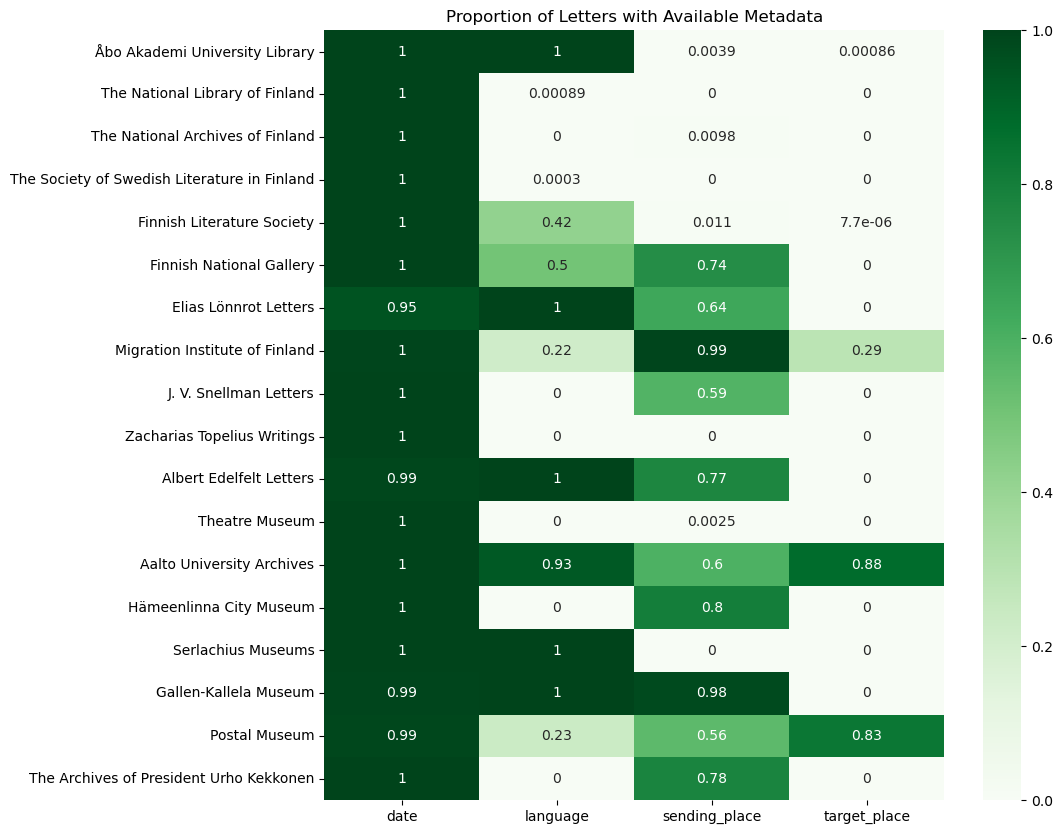

In [ ]:
event = "evt"
key = "datasource"
columns = ["date", "language", "sending_place", "target_place"]
link_metadata(df_edges, columns, key, event)

In [11]:
def create_multigraph_from_edges(all_edges, source, target, key):
    edges = all_edges.group_by([source, target, key]).agg(pl.col("evt").count()).rename({"evt":"weight"})
    G = nx.from_pandas_edgelist(
        edges,
        source=source,
        target=target,
        edge_key=key,
        edge_attr=["weight"],
        create_using=nx.MultiDiGraph(),
    )
    return G

In [12]:
def get_nodes_with_multiple_keys(G):
    node_keys = {n:[] for n in G.nodes}
    for n1,n2,k in G.edges(keys=True):
        if k not in node_keys[n1]:
            node_keys[n1].append(k)
        if k not in node_keys[n2]:
            node_keys[n2].append(k)
    multisource_nodes = [n for n in node_keys if len(node_keys[n])>1]
    multinode_prop = len(multisource_nodes)/G.number_of_nodes()
    return multisource_nodes, multinode_prop

In [13]:
def plot_degree_dist(G, type="degree", show=True, save=None):
    if type == "degree":
        degrees = [d for n,d in G.degree(weight='weight')]
    elif type == "in_degree":
        degrees = [d for n,d in G.in_degree(weight='weight')]
    elif type == "out_degree":
        degrees = [d for n,d in G.out_degree(weight='weight')]

    sns.dotplot(data=pd.DataFrame(degrees, columns=[type]), x=type)
    #pd.DataFrame(degrees, columns=[type]).head()

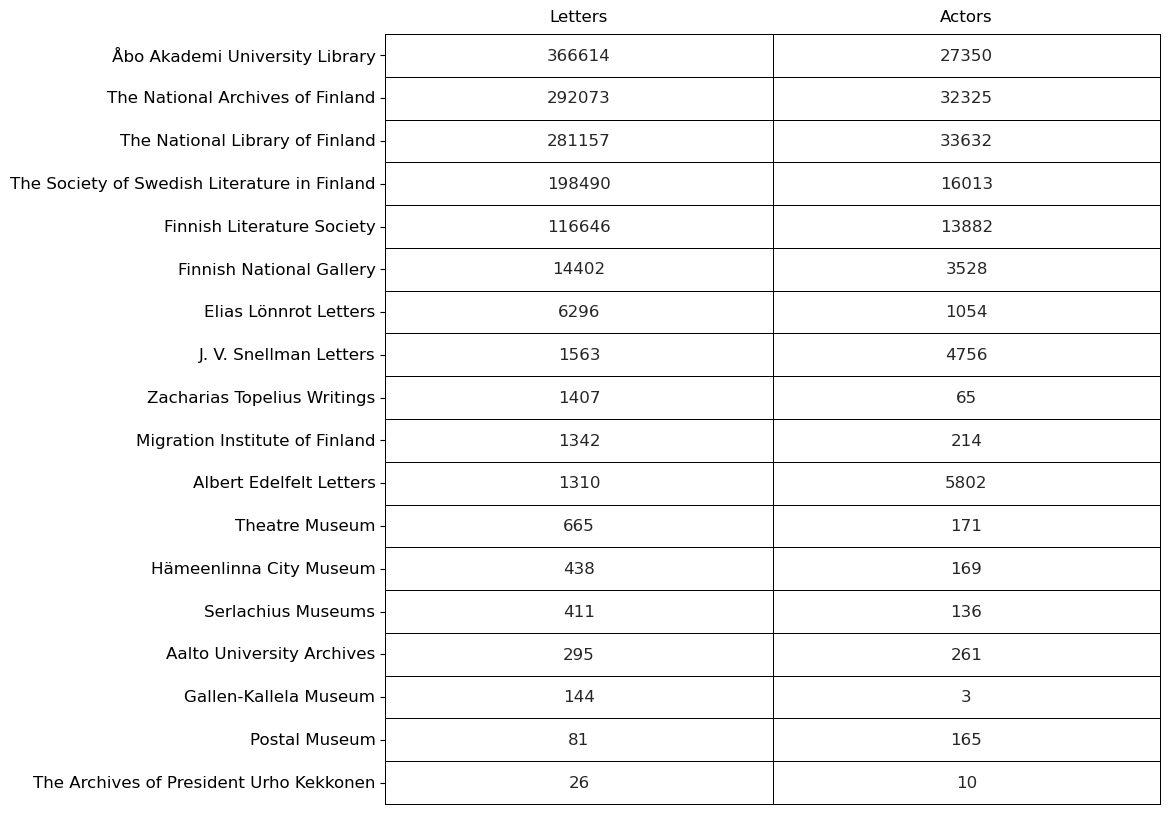

In [14]:
table_as_figure(df_numbers, "datasource")

In [15]:
G_multi = create_multigraph_from_edges(df_edges, "source", "target", "datasource")

In [16]:
multisource_nodes, multinode_prop = get_nodes_with_multiple_keys(G_multi)

print(f"Number of nodes in multiple sources: {len(multisource_nodes)} ({multinode_prop*100:.2f}% out of all the nodes)")

senders_only = [n for n in multisource_nodes if G_multi.in_degree(n, weight="weight") == 0]
receivers_only = [n for n in multisource_nodes if G_multi.out_degree(n, weight="weight") == 0]

print("Belongs to multiple sources but has only sent letters:", len(senders_only), f"({len(senders_only)/len(multisource_nodes)*100:.2f}% of multi source nodes)")
print("Belongs to multiple sources but has only received letters:", len(receivers_only), f"({len(receivers_only)/len(multisource_nodes)*100:.2f}% of multi source nodes)")

Number of nodes in multiple sources: 11312 (10.37% out of all the nodes)
Belongs to multiple sources but has only sent letters: 6719 (59.40% of multi source nodes)
Belongs to multiple sources but has only received letters: 38 (0.34% of multi source nodes)


(11312, 2)


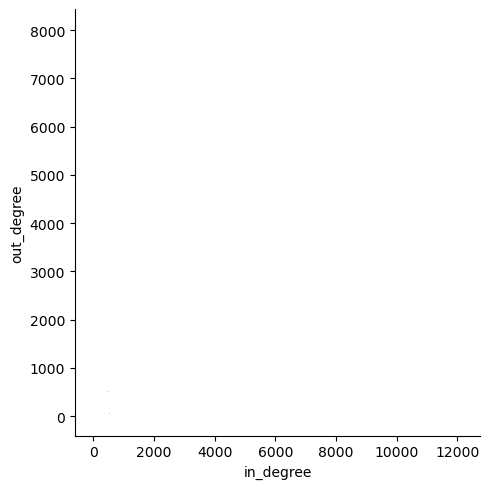

In [15]:
indegrees = [G_multi.in_degree(n, weight="weight") for n in multisource_nodes]
outdegrees = [G_multi.out_degree(n, weight="weight") for n in multisource_nodes]
deg_df = pl.DataFrame({"in_degree":indegrees, "out_degree":outdegrees})
print(deg_df.shape)
#deg_df = deg_df.filter((pl.col("in_degree") < 100) & (pl.col("out_degree") < 100))
#print(deg_df.shape)

sns.displot(data=deg_df, x="in_degree", y="out_degree")

In [20]:
high_deg_nodes = [n for n,d in sorted(G_multi.degree(weight="weight"), key=lambda x: x[1], reverse=True) if d > 19]
print(f"Number of nodes in with degree at least 20: {len(high_deg_nodes)} ({len(high_deg_nodes)/G_multi.number_of_nodes()*100:.2f}% out of all the nodes)")

Number of nodes in with degree at least 20: 11127 (10.20% out of all the nodes)


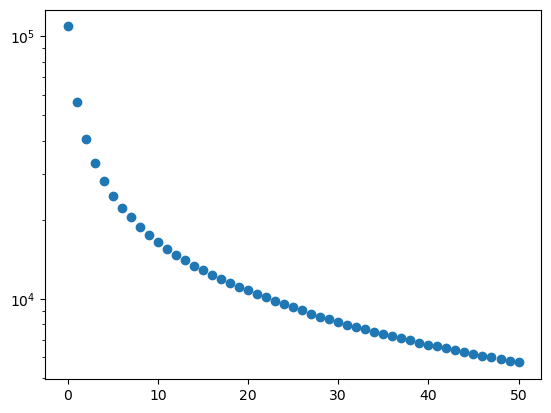

In [ ]:
x = []
y = []
for i in range(51):
    x.append(i)
    y.append(len([n for n,d in sorted(G_multi.degree(weight="weight"), key=lambda x: x[1], reverse=True) if d > i]))

plt.scatter(x,y)
plt.yscale("log")
plt.xlabel("Minimum degree")
plt.ylabel("Number of nodes")

In [48]:
high_deg_one = []
high_deg_multi = []
for i, n in enumerate(high_deg_nodes):
    if n in multisource_nodes:
        high_deg_multi.append(n)
    else:
        high_deg_one.append(n)
len(high_deg_multi)

4967

In [49]:
high_deg_one[:5]

['http://ldf.fi/coco/provided/p2228629265983884806',
 'http://ldf.fi/coco/provided/p1369105132994705127',
 'http://ldf.fi/coco/provided/p3158371580424431665',
 'http://ldf.fi/coco/provided/p9443967146978182294',
 'http://ldf.fi/coco/provided/p1688908310511709874']

In [65]:
len([n for n in multisource_nodes if G_multi.degree(n, weight="weight") > 19])

4967

In [17]:
low_deg_multinodes = [n for n in multisource_nodes if G_multi.degree(n) < 6]
len(low_deg_multinodes)/len(multisource_nodes)

0.6077616690240453

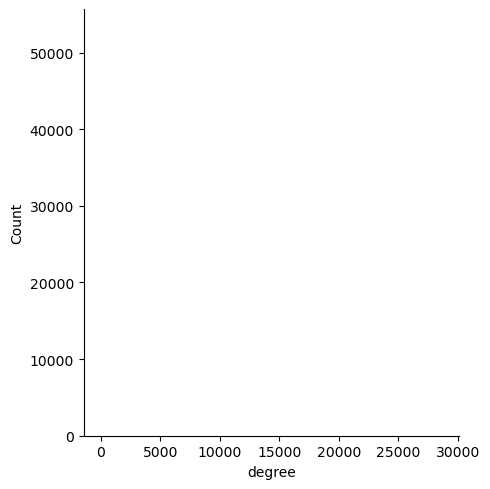

In [59]:
plot_degree_dist(G_multi, type="degree")

In [20]:
df_actors1 = df_edges.group_by("source").agg(pl.col("evt").count()).rename({"source":"actors","evt":"out_degree"})
df_actors2 = df_edges.group_by("target").agg(pl.col("evt").count()).rename({"target":"actors","evt":"in_degree"})
df_actors = df_actors1.join(df_actors2, on="actors", how="full", coalesce=True)
df_actors = df_actors.with_columns(pl.col("*").exclude("actors").fill_null(strategy="zero"))
df_actors = df_actors.filter(pl.col("actors").is_in(high_deg_nodes))
df_actors.head()

actors,out_degree,in_degree
str,u32,u32
"""http://ldf.fi/coco/provided/p2…",534,0
"""http://ldf.fi/coco/provided/p2…",50,42
"""http://ldf.fi/coco/provided/p1…",201,1055
"""http://ldf.fi/coco/provided/p0…",73,1
"""http://ldf.fi/coco/provided/p1…",85,1


In [21]:
max_sources = len(list(df_edges.select("datasource").unique()["datasource"].to_list()))
max_sources

18

## Added actors 1

In [22]:
count_all = False

In [23]:
df_actors_out = df_edges.filter(pl.col("source").is_in(multisource_nodes)).group_by(["source", "datasource"]).agg(pl.col("target"))
df_actors_out = df_actors_out.with_columns(num_targets=pl.col("target").list.n_unique())
df_actors_out.head()

source,datasource,target,num_targets
str,str,list[str],u32
"""http://ldf.fi/coco/provided/p2…","""Åbo Akademi University Library""","[""http://ldf.fi/coco/provided/p1274499939533623410"", ""http://ldf.fi/coco/provided/p1029766279789505071"", … ""http://ldf.fi/coco/provided/p1029766279789505071""]",2
"""http://ldf.fi/coco/provided/p1…","""The National Archives of Finla…","[""http://ldf.fi/coco/provided/p2276718939094992639"", ""http://ldf.fi/coco/provided/p2276718939094992639"", … ""http://ldf.fi/coco/provided/p2276718939094992639""]",1
"""http://ldf.fi/coco/provided/p1…","""The National Archives of Finla…","[""http://ldf.fi/coco/provided/p0000000000000004594"", ""http://ldf.fi/coco/provided/p0000000000000004594""]",1
"""http://ldf.fi/coco/provided/p1…","""The National Library of Finlan…","[""http://ldf.fi/coco/provided/p0000000000000003339""]",1
"""http://ldf.fi/coco/provided/p1…","""Åbo Akademi University Library""","[""http://ldf.fi/coco/provided/p0000000000000003633""]",1


In [24]:
actor_out_counts = [] 

for a in multisource_nodes:
    df_sources = df_actors_out.filter(pl.col("source") == a).sort("num_targets", descending=True)
    if df_sources.shape[0]>0:
        actors = []
        actors_s1 = df_sources.row(0)[-1] #len(list(set(df_sources.row(0)[2])))
        #print(df_sources.row(0)[2])
        if count_all:
            for i, row in enumerate(df_sources.iter_rows()):
                actors += row[2]
                actors = list(set(actors))
                actor_out_counts.append([a, i+1, len(actors)/actors_s1, len(actors)])
        else:
            i = df_sources.shape[0]
            for row in df_sources.iter_rows():
                actors += row[2]
            total_actors = len(set(actors))
            actor_out_counts.append([a,i,total_actors/actors_s1, total_actors])


df_actor_out_counts = pl.from_numpy(np.array(actor_out_counts), schema=["actor","source_rank","prop", "num_correspondences"])
df_actor_out_counts = df_actor_out_counts.with_columns(pl.col("prop").cast(pl.Float32))
df_actor_out_counts = df_actor_out_counts.with_columns(pl.col("num_correspondences").cast(pl.Int32))
df_actor_out_counts = df_actor_out_counts.with_columns(pl.col("source_rank").cast(pl.Int32))
df_actor_out_counts = df_actor_out_counts.with_columns(pl.lit("sender").alias("type")).unique(subset=["actor", "source_rank"])
df_actor_out_counts.head()

actor,source_rank,prop,num_correspondences,type
str,i32,f32,i32,str
"""http://ldf.fi/coco/provided/p1…",2,2.0,2,"""sender"""
"""http://ldf.fi/coco/provided/p1…",2,2.0,2,"""sender"""
"""http://ldf.fi/coco/provided/p2…",3,3.0,3,"""sender"""
"""http://ldf.fi/coco/provided/p1…",6,4.0,12,"""sender"""
"""http://ldf.fi/coco/provided/p1…",2,1.333333,4,"""sender"""


In [25]:
df_actors_in = df_edges.filter(pl.col("target").is_in(multisource_nodes)).group_by(["target", "datasource"]).agg(pl.col("source"))
df_actors_in = df_actors_in.with_columns(num_sources=pl.col("source").list.n_unique())
df_actors_in.head()

target,datasource,source,num_sources
str,str,list[str],u32
"""http://ldf.fi/coco/provided/p1…","""The National Library of Finlan…","[""http://ldf.fi/coco/provided/p1454506981798735635"", ""http://ldf.fi/coco/provided/p1454506981798735635"", … ""http://ldf.fi/coco/provided/p1995724838324040110""]",3
"""http://ldf.fi/coco/provided/p2…","""The National Library of Finlan…","[""http://ldf.fi/coco/provided/p1105942205184450900"", ""http://ldf.fi/coco/provided/p1105942205184450900""]",1
"""http://ldf.fi/coco/provided/p1…","""The Society of Swedish Literat…","[""http://ldf.fi/coco/provided/p1089018728317969660"", ""http://ldf.fi/coco/provided/p1484986582464218161"", … ""http://ldf.fi/coco/provided/p1484986582464218161""]",2
"""http://ldf.fi/coco/provided/p1…","""The National Archives of Finla…","[""http://ldf.fi/coco/provided/p2553589148236019640"", ""http://ldf.fi/coco/provided/p2669718540301250059"", … ""http://ldf.fi/coco/provided/p2850846207695056886""]",88
"""http://ldf.fi/coco/provided/p1…","""Finnish Literature Society""","[""http://ldf.fi/coco/provided/p0000000000000002125"", ""http://ldf.fi/coco/provided/p0000000000000002125"", ""http://ldf.fi/coco/provided/p0000000000000002125""]",1


In [26]:
actor_in_counts = [] 

for a in multisource_nodes:
    df_sources = df_actors_in.filter(pl.col("target") == a).sort("num_sources", descending=True)
    if df_sources.shape[0]>0:
        actors = []
        actors_s1 = df_sources.row(0)[-1] #len(list(set(df_sources.row(0)[2])))
        #print(df_sources.row(0)[2])
        if count_all:
            for i, row in enumerate(df_sources.iter_rows()):
                actors += row[2]
                actors = list(set(actors))
                actor_in_counts.append([a, i+1, len(actors)/actors_s1], len(actors))
        else:
            i = df_sources.shape[0]
            for row in df_sources.iter_rows():
                actors += row[2]
            total_actors = len(set(actors))
            actor_in_counts.append([a,i,total_actors/actors_s1, total_actors])


df_actor_in_counts = pl.from_numpy(np.array(actor_in_counts), schema=["actor","source_rank","prop", "num_correspondences"])
df_actor_in_counts = df_actor_in_counts.with_columns(pl.col("prop").cast(pl.Float32))
df_actor_in_counts = df_actor_in_counts.with_columns(pl.col("num_correspondences").cast(pl.Int32))
df_actor_in_counts = df_actor_in_counts.with_columns(pl.col("source_rank").cast(pl.Int32))
df_actor_in_counts = df_actor_in_counts.with_columns(pl.lit("receiver").alias("type")).unique(subset=["actor", "source_rank"])
df_actor_in_counts.head()

actor,source_rank,prop,num_correspondences,type
str,i32,f32,i32,str
"""http://ldf.fi/coco/provided/p1…",1,1.0,11,"""receiver"""
"""http://ldf.fi/coco/provided/p1…",1,1.0,1,"""receiver"""
"""http://ldf.fi/coco/provided/p0…",1,1.0,1,"""receiver"""
"""http://ldf.fi/coco/provided/p1…",1,1.0,14,"""receiver"""
"""http://ldf.fi/coco/provided/p1…",1,1.0,1,"""receiver"""


In [39]:
palette = {"sender":"wheat", "receiver":"lightsteelblue"}
palette2 = {"sender":"orange", "receiver":"royalblue"}

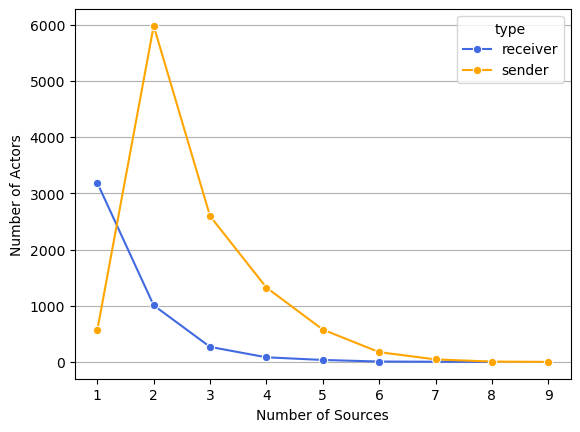

In [40]:
df_actor_counts = pl.concat([df_actor_out_counts, df_actor_in_counts], how="vertical").sort(["source_rank", "type"])
df_actor_source_counts = df_actor_counts.group_by(["source_rank", "type"]).agg(pl.col("actor").count().alias("actors")).sort(["source_rank", "type"])
fig, ax = plt.subplots()
sns.lineplot(data=df_actor_source_counts, x="source_rank", y="actors", hue="type", marker="o",ax=ax, palette=palette2)
ax.set_xlabel("Number of Sources")
ax.set_ylabel("Number of Actors")
plt.gca().yaxis.grid(True)
# Number of actors who have at least x number of sources

Text(0, 0.5, 'Number of Correspondences')

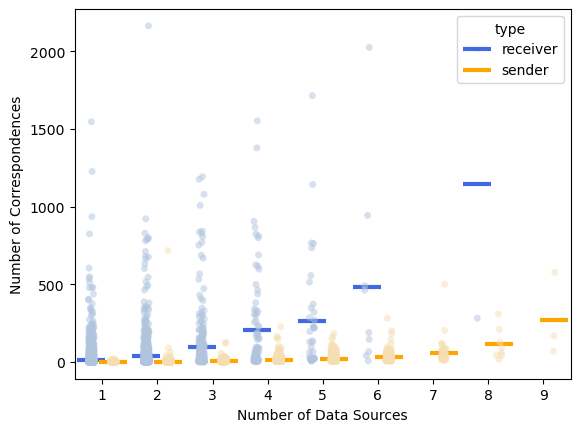

In [42]:
fig, ax = plt.subplots()
sns.stripplot(
    data=df_actor_counts, x="source_rank", y="num_correspondences", hue="type",
    dodge=True, alpha=.5, legend=False, ax=ax, palette=palette
)
sns.pointplot(
    data=df_actor_counts, x="source_rank", y="num_correspondences", hue="type",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3, ax=ax, palette=palette2
)
ax.set_xlabel("Number of Data Sources")
ax.set_ylabel("Number of Correspondences")

<Axes: xlabel='source_rank', ylabel='actors'>

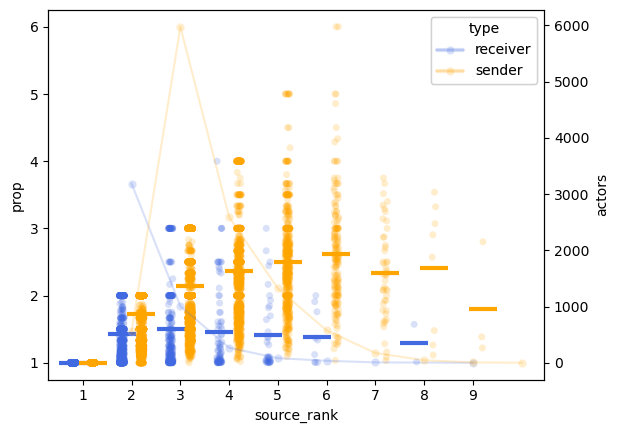

In [30]:
fig, ax = plt.subplots()
sns.stripplot(
    data=df_actor_counts, x="source_rank", y="prop", hue="type",
    dodge=True, alpha=.2, legend=False, ax=ax, palette=palette
)
sns.pointplot(
    data=df_actor_counts, x="source_rank", y="prop", hue="type",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3, ax=ax, palette=palette
)
ax2 = ax.twinx()
sns.lineplot(data=df_actor_source_counts, x="source_rank", y="actors", hue="type", marker="o",ax=ax2, palette=palette, alpha=0.2)


In [31]:
df_actor_counts2 = df_actor_counts.filter(pl.col("source_rank") != 1)
df_actor_counts2 = df_actor_counts2.filter(pl.col("num_correspondences") > 5)

<Axes: xlabel='source_rank', ylabel='prop'>

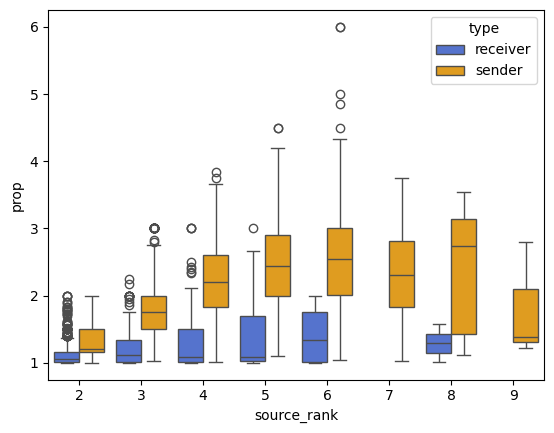

In [43]:
sns.boxplot(data=df_actor_counts2, x="source_rank", y="prop", hue="type",palette=palette2)

In [33]:
df_actor_counts.shape

(15867, 5)

In [34]:
len(multisource_nodes)

11312

In [35]:
df_actor_counts.unique(["actor"]).shape #(9158, 4)

(11312, 5)

Text(0, 0.5, 'Number of Actors Compared to Primary Source')

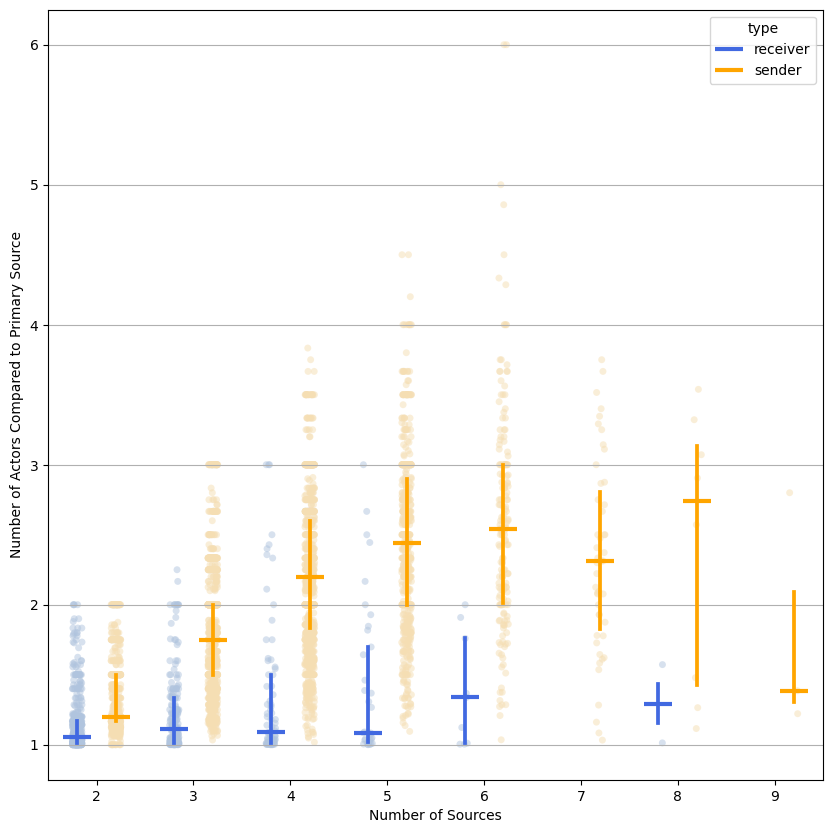

In [56]:
fig, ax = plt.subplots(figsize=FIG_SIZE)
sns.stripplot(
    data=df_actor_counts2, x="source_rank", y="prop", hue="type",
    dodge=True, alpha=.5, legend=False, ax=ax, palette=palette, zorder=1
)
sns.pointplot(
    data=df_actor_counts2, x="source_rank", y="prop", hue="type",
    dodge=.4, linestyle="none", errorbar=("pi", 50), legend=True, estimator="median",
    marker="_", markersize=20, markeredgewidth=3, ax=ax, palette=palette2, zorder=5
)
plt.gca().yaxis.grid(True)
ax.set_xlabel("Number of Sources")
ax.set_ylabel("Number of Actors Compared to Primary Source")

In [ ]:
df_actor_counts2

In [51]:
df_actor_counts2.group_by(["source_rank","type"]).agg(pl.col("prop").mean()).sort("source_rank")

source_rank,type,prop
i32,str,f32
2,"""sender""",1.35188
2,"""receiver""",1.14165
3,"""sender""",1.804157
3,"""receiver""",1.215563
4,"""receiver""",1.345789
…,…,…
6,"""sender""",2.610299
7,"""sender""",2.332269
8,"""sender""",2.408326


# Visualizations